<a href="https://colab.research.google.com/github/LeonardoSer/Univ/blob/main/NetFlow/jupyter/MaxFlowMinCutCalculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A max-flow/min-cut calculator

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.DiGraph()

In [15]:
G.add_nodes_from(['s', 'a', 'b', 'c', 'd','e', 't'])

In [16]:
G.add_edge('s','a', capacity=14)
G.add_edge('s','e', capacity=28)

G.add_edge('a','b', capacity=23)

G.add_edge('b','t', capacity=22)

G.add_edge('c','d', capacity=8)
G.add_edge('c','b', capacity=15)

G.add_edge('d','e', capacity=5)
G.add_edge('d','b', capacity=9)
G.add_edge('d','t', capacity=15)

G.add_edge('e','a', capacity=12)
G.add_edge('e','c', capacity=10)

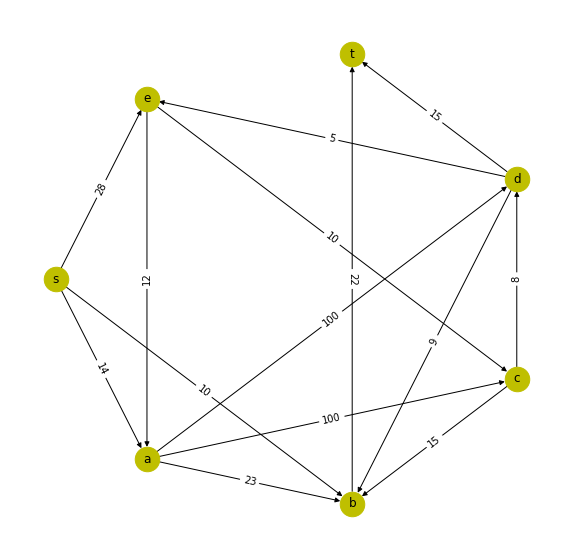

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

pos = nx.shell_layout(G)

nx.draw_networkx_edge_labels (G, pos, edge_labels=nx.get_edge_attributes(G, 'capacity'))

nx.draw(G, pos, ax, with_labels=True, node_size=600, node_color='y')

In [26]:
value, flow = nx.maximum_flow(G, 's', 't')

value, cut = nx.minimum_cut(G, 's', 't')

37


In [19]:
for i in flow:
    for j in flow[i]:
        G[i][j]['flow'] = flow[i][j]

In [22]:
for a in G.edges(data=True):
    print(a)

('s', 'a', {'capacity': 14, 'flow': 5})
('s', 'b', {'capacity': 10, 'flow': 10})
('s', 'e', {'capacity': 28, 'flow': 22})
('a', 'c', {'capacity': 100, 'flow': 0})
('a', 'd', {'capacity': 100, 'flow': 16})
('a', 'b', {'capacity': 23, 'flow': 1})
('b', 't', {'capacity': 22, 'flow': 22})
('c', 'd', {'capacity': 8, 'flow': 8})
('c', 'b', {'capacity': 15, 'flow': 2})
('d', 't', {'capacity': 15, 'flow': 15})
('d', 'e', {'capacity': 5, 'flow': 0})
('d', 'b', {'capacity': 9, 'flow': 9})
('e', 'a', {'capacity': 12, 'flow': 12})
('e', 'c', {'capacity': 10, 'flow': 10})


In [23]:
edge_lab = {(i, j):[G[i][j]['flow'], 
               G[i][j]['capacity']] for i, j in G.edges()}

nodes_in_R = cut[0]
nodes_not_in_R = cut[1]

In [24]:
nodes_not_in_R

{'t'}

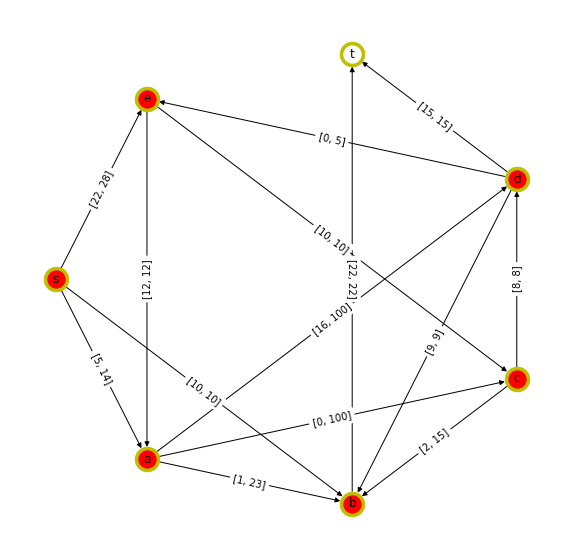

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

pos = nx.shell_layout(G)

nx.draw_networkx_edge_labels (G, pos, edge_labels=edge_lab)

nx.draw(G, pos, ax, with_labels=True, node_size=600, node_color='y')

nx.draw_networkx_nodes(G, pos, nodelist=nodes_in_R, node_color='r')
nx.draw_networkx_nodes(G, pos, nodelist=nodes_not_in_R, node_color='w')


